# Import bibliotek, wczytanie danych: iris.csv

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
iris_data = pd.read_csv('iris.csv',
                       usecols=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species'])
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [8]:
iris_data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# Grupowanie hierarchiczne algomeracyjne

In [9]:
from scipy.cluster.hierarchy import linkage, dendrogram, ward, fcluster
from sklearn.cluster import AgglomerativeClustering

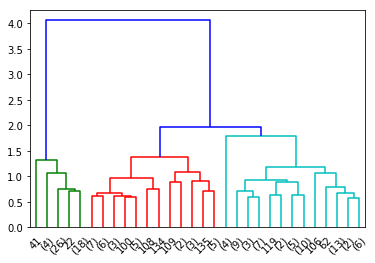

In [49]:
iris_1 = iris_data.drop(columns=['species'])
z = linkage(iris_1,
            method='average',
            metric='euclidean')
prog_proc = 0.45
prog = prog_proc * max(z[:,2])
iris_1['my_species'] = fcluster(z,
                                prog,
                                criterion='distance')
dend = dendrogram(z,
                  truncate_mode='lastp',
                  color_threshold=prog)

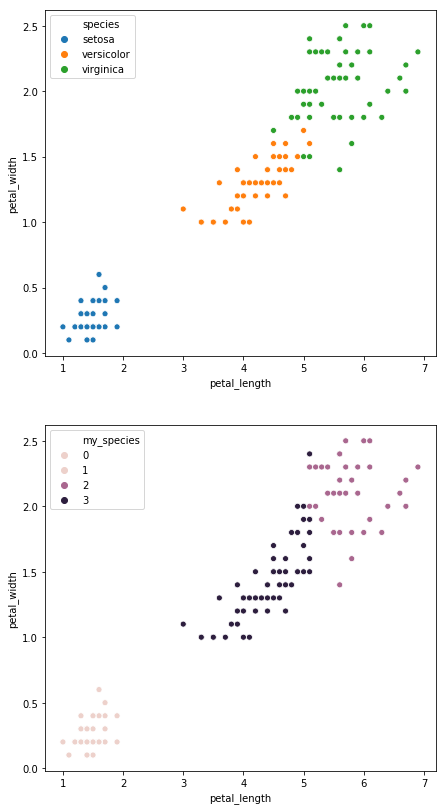

In [70]:
plt.figure(figsize=(7,14))
plt.subplot(2, 1, 1)
sns.scatterplot(data=iris_data,
               x='petal_length',
               y='petal_width',
               hue='species')

plt.subplot(2, 1, 2)
sns.scatterplot(data=iris_1,
               x='petal_length',
               y='petal_width',
               hue='my_species')

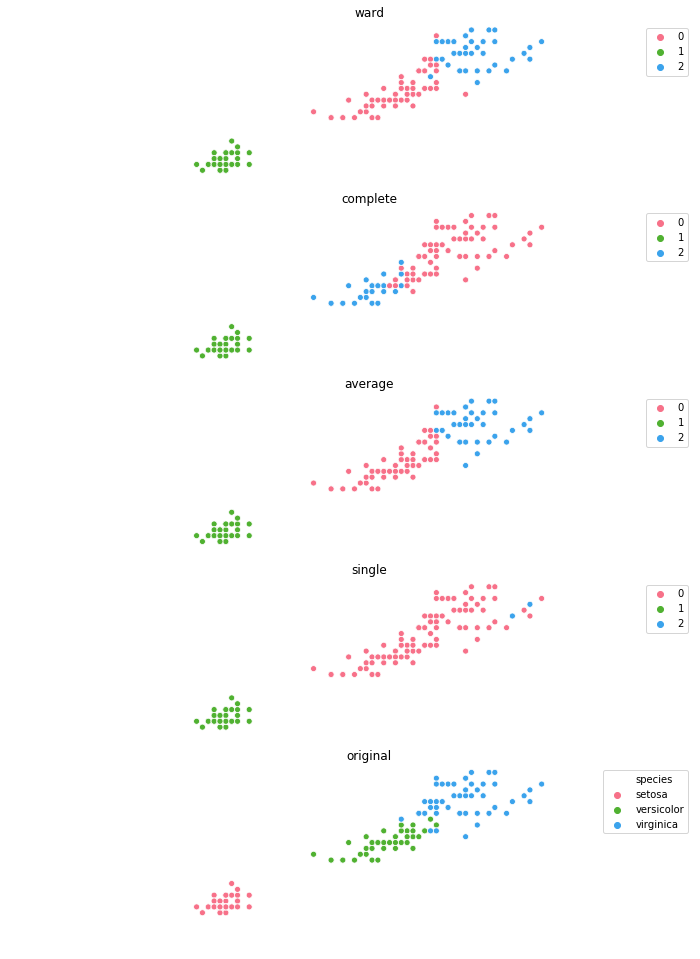

In [68]:
iris_2 = iris_data.drop(columns=['species'])
plt.figure(figsize=(9,14))
for i, linkage_criterion in enumerate(('ward', 'complete', 'average', 'single')):
    plt.subplot(5, 1, i+1)
    model = AgglomerativeClustering(linkage=linkage_criterion,
                                    n_clusters = 3)
    model.fit(iris_2)
    sns.scatterplot(data=iris_2,
                    x='petal_length',
                    y='petal_width',
                    hue=model.labels_,
                    palette=sns.color_palette("husl", n_colors=3))
    plt.title(linkage_criterion)
    plt.axis('equal')
    plt.axis('off')
    plt.subplots_adjust(bottom=0, top=.89, wspace=0, left=0, right=1)
plt.subplot(5, 1, 5)
sns.scatterplot(data=iris_data,
                x='petal_length',
                y='petal_width',
                hue='species',
                palette=sns.color_palette("husl", n_colors=3))
plt.title('original')
plt.axis('equal')
plt.axis('off')
plt.subplots_adjust(bottom=0, top=.89, wspace=0, left=0, right=1)